In [3]:
!pip install yfinance


  Using cached yfinance-0.2.65-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached multitasking-0.0.12.tar.gz (19 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached peewee-3.18.2.tar.gz (949 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached curl_cffi-0.12.0-cp39-abi3-win_amd64.whl.metadata (15 kB)
Using cached yfinance-0.2.65-py2.py3-none-any.whl (119 kB)
Using cached curl_cffi-0.12.0-cp39-abi3-win_amd64.whl (1.6 MB)
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15617 sha256=bb97a5c7bcd7ce607e168ace758efd22e188cfda45681df1407daf4018e4d186
  Stored in directory: c:\users\reddy\appdata

In [5]:
# Step 1: Import Libraries
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [7]:
# Step 2: Download Stock Data
data = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
data = data[['Close']]
data['Prediction'] = data[['Close']].shift(-30)
data.tail()

C:\Users\reddy\AppData\Local\Temp\ipykernel_14228\2271969962.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('AAPL', start='2015-01-01', end='2024-12-31')
Failed to get ticker 'AAPL' reason: Failed to perform, curl: (16) . See https://curl.se/libcurl/c/libcurl-errors.html first for more details.
[*********************100%***********************]  1 of 1 completed


Price,Close,Prediction
Ticker,AAPL,
Date,,
2024-12-23,254.655716,NaN
2024-12-24,257.578674,NaN
2024-12-26,258.396667,NaN
2024-12-27,254.974930,NaN
2024-12-30,251.593094,NaN


In [9]:
# Step 3: Prepare Feature and Target
X = np.array(data.drop(['Prediction'], axis=1))[:-30]
y = np.array(data['Prediction'])[:-30]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Step 4: Train Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
# Step 5: Evaluate Model
model_score = model.score(X_test, y_test)
print(f'Model Accuracy: {model_score:.2f}')

Model Accuracy: 0.98


In [15]:
# Step 6: Predict Future Prices
X_future = data.drop(['Prediction'], axis=1)[-30:]
future_prediction = model.predict(X_future)
future_prediction

array([229.24089619, 232.30094243, 232.56438386, 233.29392351,
       232.80756891, 234.17545575, 237.21523012, 239.43425688,
       239.30255167, 241.73437116, 244.0243185 , 247.12489301,
       247.48966283, 247.52005515, 247.31739836, 251.27924873,
       252.31277356, 251.0157918 , 252.50529442, 252.67754339,
       255.6261098 , 258.09845755, 252.59648687, 254.35955136,
       259.12187745, 259.91221723, 262.88107102, 263.71190807,
       260.2364433 , 256.80150679])

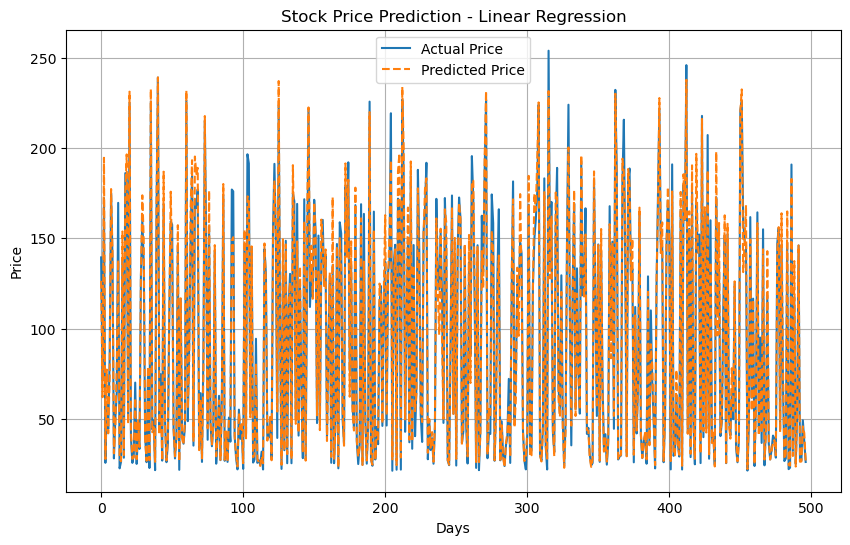

In [17]:
# Step 7: Visualize Predictions
predicted = model.predict(X_test)
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Price')
plt.plot(predicted, label='Predicted Price', linestyle='--')
plt.legend()
plt.title('Stock Price Prediction - Linear Regression')
plt.xlabel('Days')
plt.ylabel('Price')
plt.grid()
plt.show()